#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Inteligencia Artificial y Aprendizaje Automático**
###Tecnológico de Monterrey
###Prof Luis Eduardo Falcón Morales

### **Semana 7**
####**Varianza vs Sesgo y Curvas de arendizaje (learning curves).**



#**Parte 1 - Curvas de aprendizaje**

###**Modelo subentrenado y sobreentrenado**

En las semanas pasadas hemos mencionando en varias ocasiones los conceptos de subentrenamiento y sobreentrenamiento cuando nos queremos referir a qué tan bien entrenado está un modelo. Cuando hablamos de subentrenamiento nos referimos a que el modelo no debe ser demasiado sencillo que no alcance a explicar el comportamiento de la variable de salida. Y cuando nos referimos a sobreentrenamiento nos referimos a que no queremos tampoco un modelo tan complejo que se aprende hasta el ruido inherente a los datos de entrenamiento, pero no sabe generalizar con los datos de validación y prueba. Además, esto aplica tanto a los modelos de regresión como a los de clasificación. En conclusión, queremos estar en un término medio, no demasiado simple, pero tampoco demasiado complejo como se muestra en el siguiente diagrama.



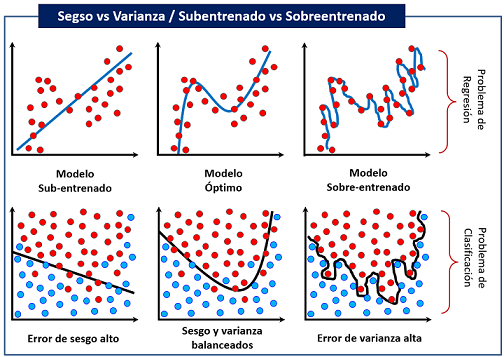

Hasta aquí suena razonable perseguir dicho objetivo: ni muy sencillo, ni muy comlejo. Pero ¿cómo saber si estoy en uno de estos casos extremos? La dimensionalidad tan alta que pueden tener los datos de entrada y la naturaleza tan diversa de cada factor no hace sencilla la tarea de saber si estoy en el modelo adecuado o en el caso de sub o sobre entrenamiento.

Cuando estudiamos el ejemplo del California Housing Prices realizamos un análisis cuantitativo para tener una idea sobre el tipo de modelo que teníamos. Sin embargo, no siempre dichos análisis son suficientes. Estudiaremos en la actividad de esta semana varias representaciones visuales, gráficas, que nos ayudarán a determinar de mejor manera la calidad del modelo generado.

###**Conjuntos de entrenamiento, validación y prueba.**

Ya comentamos la importancia de tener un conjunto de entrenamiento, uno de validación y otro de prueba.

El objetivo ahora es monitorear el proceso durante el aprendizaje del modelo a lo largo de sus ciclos de entrenamiento. A cada ciclo del modelo con todos los datos del conjunto de entrenamiento se le llama una época (epoch en inglés). En cada época, o cada cierto número de épocas, se puede estar calculando y registrando el desempeño del modelo en el conjunto de entrenamiento y en el de validación. Dichos registros se visualizarán en un gráfico con un par de curvas llamadas **curvas de aprendizaje** (learning curves).

Con el conjunto de entrenamiento queremos que el modelo aprenda a modelar el comportamiento de las variables de entrada encontrando los mejores pesos que ayuden a predecir la variable de salida. Es decir, el modelo primero debe aprender de los datos de etrenamiento y al gráfico que refleja dicho comportamiento se le llamará **curva de aprendizaje de entrenamiento** o simplemente **curva de entrenamiento**.

Por otro lado, el conjunto de validación (y de prueba) nos ayudará a verificar que el modelo también está aprendiendo a escalar y generalizar las predicciones a conjuntos de datos que no vió cuando se le entrenó. Al gráfico que refleja el desempeño del modelo con el conjunto de validación se le llama **curva de aprendizaje de validación** o simplemente **curva de validación**.

Al conjunto de ambas curvas, de entrenamiento y validación, se le llama **curvas de aprendizaje**.

Así, el seguimiento de los diferentes tipos de errores en el conjunto de entrenamiento y en el de validación nos llevará a entender mejor el tipo de modelo que estamos generando, además de apoyar en la manera en que podríamos proceder para reducir dichos errores. Así, repasemos a continuación lo referente a los diferentes tipos de errores que se generan durante el proceso de entrenamiento y validación.

###**Tipo de errores**

Un método de aprendizaje supervisado (machine learning) busca obtener un modelo o función objetivo $f$ que transforma datos de entrada $X$ en valores de salida $Y$. Estamos suponiendo que existe teóricamente dicha función $f$ con un ruido asociado, de tal manera que:

$Y = f(X) + error_{Total}(X)$.

Entonces si $\hat{f}$ es la función que aproxima a dicha función teórica $f$, el error total del modelo se puede descomponer a su vez como sigue:

$error_{Total}(X) = (E[\hat{f}(X)] - f(X))^2 + E[(\hat{f}(X) - E[\hat{f}(X)])^2] + error_{ruido}$.

El primer sumando es el error asociado al sesgo, ya que cuando $\hat{f}$ es demasiado simple, el promedio (valor esperado) de sus predicciones $E[\hat{f}(X)]$   estará muy lejos de los valores verdaderos $f$.

El segundo sumando es la varianza o variabilidad de las predicciones $\hat{f}$ y por lo tanto precisamente el error asociado a la varianza.

Finalmente todo problema real tiene asociado un error inherente irreducible o ruido, denotado $error_{ruido}$. Cuando un modelo empieza a querer modelar también el ruido durante la etapa de entrenamiento es cuando nos lleva al caso sobreentrenado.

Como se ilustra en la imagen de abajo, en lo problemas reales ajustar el entrenamiento de un modelo para disminuir el error del sesgo implica que aumentará la varianza y viceversa. Esto nos lleva al llamado dilema del sesgo y la varianza (en inglés bias-variance tradeoff).



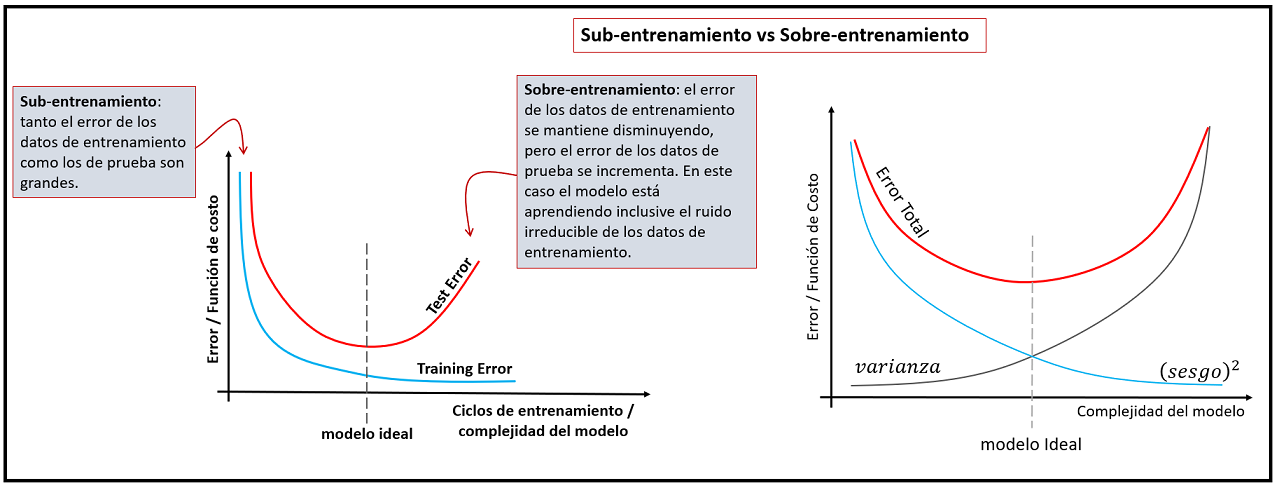

###**El dilema del sesgo y la varianza (bias-variance tradeoff)**

La manera en que un modelo de aprendizaje supervisado hace sus predicciones se ejemplifica usualmente con un tiro al blanco, como se muestra a continuación. En el caso ideal se desea que el promedio de los tiros esté dentro de la diana, es decir, en el centro del blanco, esto es lo que sería un error con sesgo bajo. Por otro lado se desea también que la variabilidad entre los diferentes tiros sea pequeña, lo que implica tener una variabilidad o varianza pequeña. Incurrir en cualquier de estos errores nos lleva a un mal resultado. Por ejemplo un sesgo bajo con varianza alta es lo que conocemos en aprendizaje supervisado como modelo sobreentrenado y un error de sesgo alto con varianza baja nos lleva al llamado modelo subentrenado.



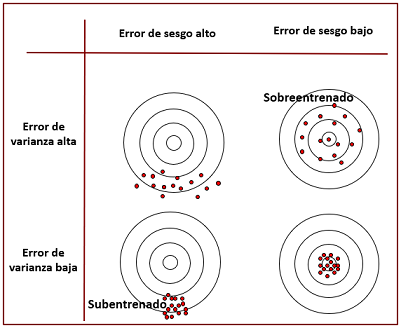

Es claro que debemos buscar el mejor balance en la reducción de los errores de variabilidad y sesgo. Sin embargo, en particular el error del sesgo está muy relacionado con el error inherente (también llamado error inevitable del problema), es decir, con el ruido.

El ruido no puede evitarse, en dado caso puede intentar reducirse durante la etapa de preprocesamiento y limpieza de los datos.

El error total no podrá llegar a reducirse más allá del ruido inherente al problema. Sin embargo, ¿cómo saber cuál es el llamado **error óptimo** mínimo que separa el ruido del error del sesgo que sí es reducible? Teóricamente podría modelarse matemáticamente dicho ruido de acuerdo a las características del problema, sin embargo, en general no se tiene suficiente información para poder proponer un modelo del ruido adecuado. En su lugar se puede utilizar lo que se llama el **nivel de desempeño humano**, es decir, generar un modelo con un desempeño que sea tan eficiente en sus predicciones como la del mejor especialista en el tema. Por ejemplo, si se está entrenando un modelo para predecir si un paciente tiene COVID-19 a partir de varias radiografías de sus pulmones, se puede hacer una consulta con varios médicos especialistas para determinar el porcentaje de error (y de éxito) promedio en su predicciones y dicho valor tomarlo como medida del error inevitable del problema.

Finalmente, puede también proponerse un **porcentaje o tasa de error deseada** como valor óptimo, una vez llevado a cabo un análisis del costo-beneficio de las implicaciones del modelo con los tomadores de decisiones de la empresa.   

Dicha combinación de los tres tipos de errores a los cuales se enfrenta cualquier problema de aprendizaje automático, el de varianza, sesgo y ruido, se ilustra en el siguiente gráfico. El eje horizontal indica los ciclos de entrenamiento (también llamados épocas) los cuales llevan a un modelo más complejo cada vez. El eje vertical nos habla del error total del modelo.



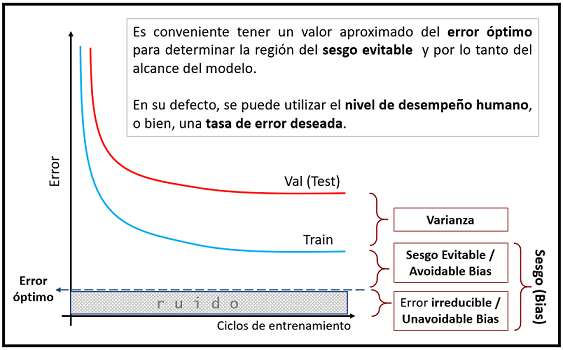

Así, durante la etapa de entrenamiento se espera que en cada nuevo ciclo (época) el modelo vaya aprendiendo cada vez mejor de los datos y para verificarlo se puede evaluar en cada época el error y el desempeño del modelo. Por su lado también debe verificarse que el modelo sepa generalizar a datos que no ha usado durante el entrenamiento, para lo cual se utiliza el conjunto de validación (o prueba) para estar midiendo dicho desempeño.   

Las llamadas curvas de aprendizaje nos ayudarán a verificar ambos criterios, que el modelo esté aprendiendo adecuadamente con el conjunto de entrenamiento y a su vez que sea escalable a datos nuevos mediante el uso del conjunto de validación.

El gráfico anterior nos muestra la manera de verificarlo: con la curva del error de los datos de entrenamiento (Train), la cual debe ir disminuyendo en cada época y aproximándose cada vez más al error óptimo. Por otro lado, con los datos de validación o prueba (Validation/Test) se debe verificar que el modelo a su vez sea generalizable a datos nuevos. Y eso se obtiene cuando la curva de validación tiene un comportamiento análogo al de entrenamiento, aunque posiblemente con errores algo mayores. Es decir, en general se espera que la curva de los errores de validación sea algo mayor a la de la curva de entrenamiento, esto ya que los datos de validación no los ha visto previamente el modelo y por lo tanto sus predicciones tendrán un error algo mayor que con los datos de entrenamiento, que ha estado usando para generar los pesos del modelo.  

La distancia o diferencia de la curva de entrenamiento (Train) con respecto al valor del error óptimo, nos habla del error debido al sesgo (bias). La diferencia entre las curvas de entrenamiento y validación nos hablan por otro lado del error debido a la varianza.

El entender la información de este gráfico nos ayudará a tomar mejores decisiones sobre qué ajustes realizar para reducir el error que mayormente nos esté afectando.

**Desempeño en lugar del error**

En el gráfico de las curvas de aprendizaje también es usual utilizar como eje vertical los valores de alguna métrica que mida el desempeño del modelo en lugar del error. Véase la figura a continuación.

Cabe resaltar que ambos gráficos no necesariamente son una reflexión horizontal uno de otro, pero el comportamiento de las curvas en relación al tipo de ruido asociado se espera nos lleve a las mismas conclusiones.

Observa que cuando usamos el error como eje vertical, el ruido de sesgo está limitado por el llamado **error óptimo** y en el caso de usar una métrica de desempeño en el eje vertical, a dicho valor límite se le conoce como **desempeño óptimo**.

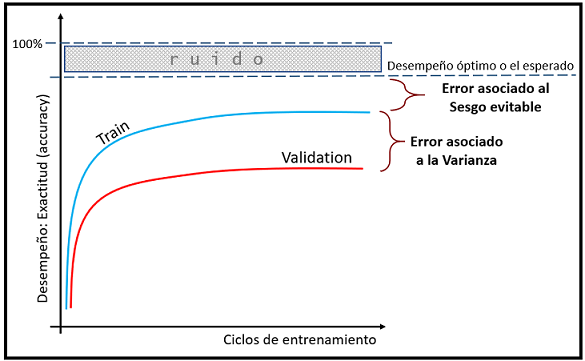

En analogía al diagrama del tiro al blanco con los errores de sesgo y varianza, incluímos ahora el equivalente con las curvas de aprendizaje (learning curves). Observa que solo uno de estos cuatro casos implica tener el modelo adecuado, cuando los errores de varianza y sesgo son ambos los suficientemente pequeños.


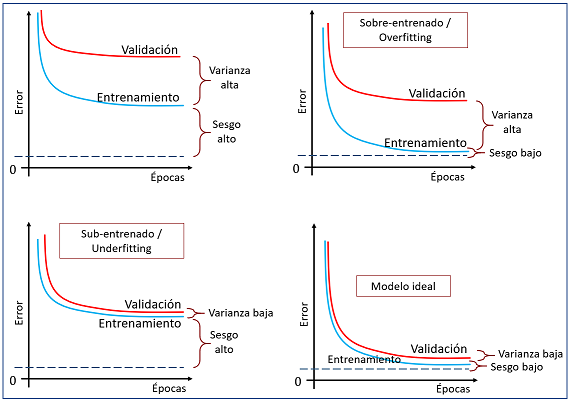


Veamos entonces cómo aprovechar estos gráficos para saber el tipo de ajustes que debemos realizar, tanto en el caso de sesgo alto como de varianza alta.


##**Cómo enfrentar el problema del sesgo alto (high bias)**



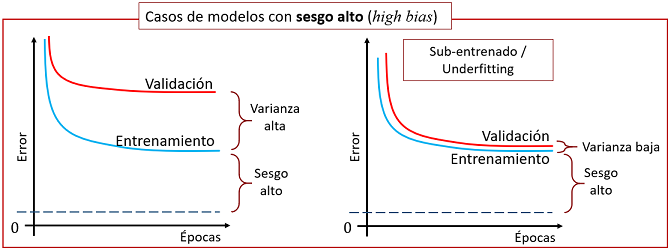

Un modelo que muestre problemas de sesgo alto nos habla de que no tiene la suficiente complejidad para poder aprender adecuadamente de los datos de entrenamiento. En particular aquí tenemos el caso del modelo subentrenado.

De manera general podemos proceder con las siguientes sugerencias que puedan ayudar a disminuir el error debido al sesgo:

*   **Incrementar la complejidad del modelo.** Esto dependerá del modelo que se esté utilizando, por ejemplo en el caso de una red neuronal artificial podría ser el incrementar el número de capas ocultas o el número de neuronas en cada capa. En el caso de un árbol de decisión podría ser el incrementar su profundidad.

*   **Cambiar a un modelo de aprendizaje automático más complejo.** Por ejemplo, supongamos que iniciamos entrenando un modelo de regresión lineal múltiple y al final obtenemos un desempeño muy pobre debido a que el problema que estamos enfrentando sea de una complejidad no lineal muy alta. Así, en lugar de querer buscar una mejor configuración de los hiperparámetros del modelo de regresión lineal para obtener un modelo más complejo como recomienda el punto anterior, puede resultar más adecuado intentar con un nuevo modelo que explique mejor los comportamientos no lineales. Aunque el inconveniente de esta decisión es la de tener que iniciar de nuevo con el ajuste de los dos errores, sesgo y varianza.  

*   **Agregar factores nuevos que ayuden a explicar mejor el comportamiento de la variable de salida.** Es decir, aplicar lo que se llama ingeniería de características (features engineering). Este paso puede implicar platicar con el personal técnico de la empresa que conozca el problema y sus factores asociados. Estos nuevos factores pueden ser características completamente nuevas que no se habían considerado previamente, o bien, alguna configuración no lineal entre los factores que ya se tienen en el conjunto de entrenamiento (por ejemplo agregar una nueva columna con los cuadrados o cubos de otra de ellas).

*   **Modificar la tasa de aprendizaje (o tamaño de paso, llamado learning rate en inglés).** Por ejemplo, ajustar dinámicamente la tasa de aprendizaje de manera que vaya disminuyendo a medida que aumenta el número de épocas.

*   **Utilizar alguna técnica de regularización.** El aplicar cualquiera de los criterios anteriores implica que la complejidad del modelo aumentará, por lo que el error de la varianza tenderá a incrementarse y por ello la necesidad de recurrir a alguna técnica de regularización como lasso ($L_1$), ridge ($L_2$) o elastic-net ($L_{12}$).

*   **Modificar la partición del conjunto de datos inicial.** Es decir, realizar una nueva partición de los datos iniciales incrementando el tamaño del conjunto de entrenamiento para que el modelo tenga una mayor capacidad de aprendizaje a partir de más datos.

* **Filtración de información (data leakage).** Evitar el filtrado de información ya que esto lleva a modelos muy optimistas que no se verán reflejados con los datos reales, una vez puesto el modelo en producción.


Cabe mencionar que un caso que usualmente también implica un modelo subentrenado es cuando las curvas de entrenamiento y validación rápidamente se estancan en un valor casi constante y ya no se modifican (ni crecen o decrecen) al incrementar las épocas. Dicho valor constante es además bastante mayor a cero. Es decir, el modelo es demasiado sencillo y no tiene la capacidad de poder "aprender" algo a lo largo del tiempo.   

Recuerda que no hay reglas universales, pero estas sugerencias te permiten tener un buen punto de partida y no dudes en estar intentando una o varias de ellas. La experiencia te irá dando una mayor madurez para la toma de decisiones en el tipo de problemas que enfrentes usualmente en tu trabajo.

Por otro lado, toma en cuenta que todos los ajustes anteriores implican mayores recursos computacionales y por lo tanto mayor tiempo de entrenamiento.

##**Cómo enfrentar el problema de la varianza alta (high variance)**

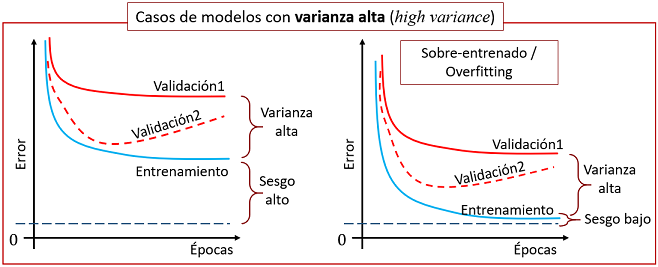

Un modelo que muestre problemas de varianza alta nos habla de que el modelo no está aprendiendo a generalizar correctamente con los datos de validación y es el llamada modelo sobreentrenado. Este es generalmente el caso más común que enfrenta cualquier científico de datos. Se puede decir que al modelo se le incluyó demasiada complejidad o demasiado tiempo de entranamiento que también ha estado modelando el ruido, lo cual lo hace muy sensible con los datos de validación al llevar a cabo predicciones con alta variabilidad.

En un buen modelo se espera que las dos curvas de aprendizaje, la de validación y la de entrenamiento, estén lo más cercana una de la otra.

De manera general podemos proceder con las siguientes sugerencias que puedan ayudar a disminuir el error debido a la varianza:

*   **Preprocesamiento.** Realizar más o mejores transformaciones y técnicas de limpieza de los datos durante la etapa de preprocesamiento. Una buena preparación de los datos puede ayudar a los modelos de optimización a converger de manera más rápida y óptima, evitando una sobreexposición del modelo a los datos de entrenamiento durante demasiadas épocas.

*   **Regularización.** Incluir alguna técnica de regularización como lasso ($L_1$), ridge ($L_2$) o elastic-net ($L_{12}$). Estas técnicas de regularización evitan el crecimiento desmedido de los pesos del modelo y por lo tanto de la memorización de los datos.

*   **Early stopping.** Detener el proceso de entrenamiento en el punto del mínimo error total de la curva de validación, antes de que dicha curva empiece a incrementar su error y separarse de la curva de los datos de etrenamiento.

*   **Mayor cantidad de épocas.** Aumentar el número de épocas de entrenamiento si observas que las curvas de entrenamiento y validación están disminuyendo su error de manera conjunta, aunque aún no lo suficiente.

*   **Tasa de aprendizaje y tamaño de bloque (batch).** Si alguna o ambas curvas de aprendizaje oscilan demasiado durante el proceso de entrenamiento, disminuir o ajustar dinámicamente la tasa de aprendizaje (tamaño de paso, learning rate). Igualmente puedes ajustar el tamaño de batch a un menor valor (de preferencia potencias de 2). Estos ajustes ayudan a que el modelo tenga una mayor capacidad y estabilidad durante el proceso de entrenamiento. Los algoritmos numéricos internos usados durante el proceso de convergencia, así como todo el manejo de los datos en general, requieren una gran cantidad de operaciones matriciales las cuales están optimizadas por las librerías cuando sus dimensiones son potencias de 2.

*   **Análisis de errores.** Realizar un análisis de los errores que se observan en el conjunto de validación para detectar y atacar aquellos que sean los más comunes o costosos. En el caso de un problema de clasificación la matriz de confusión puede ser de gran ayuda.

*   **Reducción de dimensionalidad.** Disminuir la complejidad del modelo mediante la reducción de la dimensionalidad del problema. Esto podría implicar en algunos casos eliminar factores ya sea mediante la identificación de correlaciones muy altas entre factores, o bien mediante alguna técnica de reducción de dimensionalidad. O por el contrario agregar nuevos factores o combinaciones entre algunos de ellos que brinden nueva o mejor información al modelo.

*   **Homogeneidad en la partición de los datos.** Verificar que los datos de los conjuntos de entrenamiento, validación y prueba sean de naturaleza análoga. Si la partición no se llevó de manera adecuada y los datos de validación y prueba son de naturaleza diferente a los de entrenamiento, entonces el modelo puede entrenarse muy bien con los datos de entrenamiento, pero no podrá generalizarse a los de validación y prueba debido a su naturaleza diferente.

*   **Simplificar el modelo.** Por ejemplo, si es una red neuronal, disminuir el número de neuronas o capas ocultas; en el caso de un árbol de decisión podría ser disminuir su profundidad.

*   **Agregar más datos al problema.** Siempre es recomendable el poder contar con mayor cantidad de datos en cualquier tipo de problema, aunque en los modelos subentrenados su impacto llega a ser mucho menor que en el caso de los modelos sobreentrenados.


Cuando se está en el peor de los casos, es decir, cuando se tienen sesgo y varianza altas, la recomendación sería aumentar la complejidad del modelo o bien cambiar a otro modelo de mayor complejidad para que el modelo primero aprenda de los datos de entrenamiento disminuyendo la varianza. En el segundo caso se tiene el inconveniente, como ya lo comentamos, de tener que iniciar de nuevo con el ajuste de ambos errores.

Finalmente, un modelo cuya curva de aprendizaje de los datos de entrenamiento tenga en todo momento un error mucho mayor que la curva de los datos de validación no debiera ser posible. Y de ser así, habría que revisar la partición de los conjuntos, ya que es posible que el conjunto de validación esté formado por datos mucho más sencillos que los del conjunto de entrenamiento. Como ya se mencionó en uno de los puntos anteriores, debe cuidarse en todo momento la homogeneidad de la partición de los datos de entrenamiento, validación y prueba, para que lo aprendido durante el entrenamiento se pueda ver reflejado de manera adecuada al realizar las predicciones con los datos que simulan los datos futuros no observados.

Existe otro tipo de gráfico con las curvas de aprendizaje, pero donde ahora el eje horizontal indica el incremento de datos en el conjunto de entrenamiento. Es decir, se inicia entrenando el modelo con un pequeño conjunto de datos y en cada nuevo ciclo se repite el entrenamiento pero con una mayor cantidad de datos. Se desea observar cómo afecta este proceso a las curvas de entrenamiento y de validación. El siguiente diagrama muestra un caso típico de este gráfico.


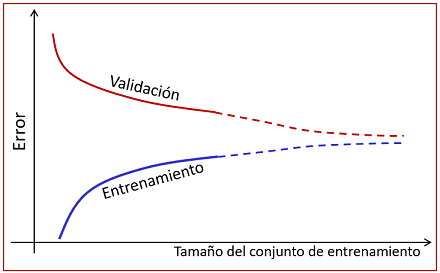



El análisis e interpretación de estos gráficos es análogo al realizado previamente.

En particular si el modelo está subentrenado, la curvas serán casi constantes desde un inicio y no cambiarán con el incremento de datos, además de tener un valor grande del error. Esta es una de las principales caracaterísticas que identifica a un modelo subentrenado, que el agregar nuevos datos no le ayuda a mejorar su desempeño.

Toma en cuenta que si en este gráfico en el cual el eje horizontal indica el incremento de tamaño del conjunto de entrenamiento consideras una métrica como la exactitud, las curvas se verían como en un espejo, es decir, la curva de entrenamiento estaría por arriba y la de validación por abajo.

Igualmente considera que cada problema y partición puede ser muy variada y la forma del gráfico puede no tener exactamente la forma genérica que se indica en cada caso.

En general trata de combinar los diferentes tipos de gráficos con análisis cuantitativos y cualitativos de los datos y el problema, para en cada momento tener la mayor cantidad de información que te ayude a tomar las mejores decisiones.

Recuerdemos que el dilema del sesgo y la varianza (bias-variance tradeoff) estará presente siempre de manera general en cada una de las problemáticas y ajustes que se acaban de proponer: el disminuir uno de estos errores, lleva a que se incrementará el otro. Por ello siempre se deben tener presentes ambos ajustes para al final evaluar y obtener el mejor modelo.

####**NOTA-Opcional**: Para saber más del tema, debes consultar las secciones llamadas "Polynomial Regression" y "Learning Curves" del capítulo 4, "Training Models" del libro de Aurélien Géron.

####Igualmente puedes consultar la documentación de scikit-learn sobre el tema:

https://scikit-learn.org/stable/modules/learning_curve.html


#**Parte - 2: Caso de las tarjetas de crédito con curvas de aprendizaje**

La semana pasada estudiamos el caso de la autorización de tarjetas de crédito en una institución bancaria australiana. Esta es la liga para que revises nuevamente el contexto del problema:

https://archive.ics.uci.edu/ml/datasets/Statlog+%28Australian+Credit+Approval%29

Recordemos que al final del análisis llevado a cabo con dicho conjunto de datos concluimos que el modelo de regresión logística con la métrica de regularización ridge $L_{2}$, logra un desempeño de exactitud (accuracy) promedio en sus predicciones del $84.06\%$, con una variabilidad dada por una desviación estándar del $4.8\%$ aproximadamente.  

Y al final quedó la pregunta abierta sobre si este modelo se puede considerar como un buen modelo listo para usarse en producción, o si por el contrario está subentrenado o sobreentrenado.

Veamos ahora cómo con lo aprendido hasta ahora sobre las curvas de aprendizaje nos ayudará a contestar esta pregunta.

Procederemos con el mismo preprocesamiento de los datos que realizamos la semana pasada y con la mejor configuración encontrada con el modelo de regresión logística. Puedes consultar el documento correspondiente si tienes alguna duda al respecto.



In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

In [34]:
mypath = "https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/australian/australian.dat"
data = pd.read_csv(mypath, sep=" ", header=None)
data.columns = ['A1','A2','A3','A4','A5','A6','A7','A8','A9','A10','A11','A12','A13','A14','class']
print(set(data['A4']))

{1, 2, 3}


In [35]:
# leyendo y cargando los datos:

mypath = "https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/australian/australian.dat"
data = pd.read_csv(mypath, sep=" ", header=None)
data.columns = ['A1','A2','A3','A4','A5','A6','A7','A8','A9','A10','A11','A12','A13','A14','class']
print(data['A4'])
# Algunos ajustes previos con datos categóricos con niveles de muy baja frecuencia con fines didácticos:
data['A4'] = data['A4'].map({2:2, 1:0, 3:0})

data['A5'] = data['A5'].map({1:1,2:0,3:3,4:4,5:0,6:6,7:7,8:8,9:9,10:0,11:11,12:0,13:13,14:14})
data['A6'] = data['A6'].map({1:1,2:0,3:0,4:4,5:5,7:0,8:8,9:0})
print(set(data['A4']))
# Definimos nuestros datos de entrada, de salida y la partición correspondiente:
X = data.iloc[:,:-1]
Y = data.iloc[:,-1]

Xtv, Xtest, ytv, ytest = train_test_split(X, Y, test_size=0.2, random_state=1)
print(Xtv.shape, ': dimensión de datos de entrada de entrenamiento y validación')
print(Xtest.shape, ': dimensión de datos de entrada de prueba')
print(ytv.shape, ': dimensión de variable de salida para entrenamiento y validación')
print(ytest.shape, ': dimensión de variable de salida para prueba')

0      2
1      2
2      1
3      1
4      2
      ..
685    2
686    2
687    2
688    2
689    2
Name: A4, Length: 690, dtype: int64
{0, 2}
(552, 14) : dimensión de datos de entrada de entrenamiento y validación
(138, 14) : dimensión de datos de entrada de prueba
(552,) : dimensión de variable de salida para entrenamiento y validación
(138,) : dimensión de variable de salida para prueba


In [36]:
# Transformaciones a factores numéricos de entrada:
num_pipeline = Pipeline(steps = [('impMediana', SimpleImputer(strategy='median')),
                                 ('escalaNum', MinMaxScaler(feature_range=(1,2)))])
num_pipeline_nombres = ['A2','A3','A7','A10','A13','A14']

# Transformaciones a factores categóricos de entrada:
catImp_pipeline = Pipeline(steps = [('impModa', SimpleImputer(strategy='most_frequent'))])
catImp_pipeline_nombres = ['A1', 'A4', 'A5', 'A6', 'A8', 'A9', 'A11', 'A12']

# Transformaciones one-hot-encoder en algunas de las categóricas:
catOHE_pipeline = Pipeline(steps = [('OneHotE', OneHotEncoder(drop='first'))])
catOHE_pipeline_nombres = [ 'A4','A5','A6','A12']

# Conjuntamos las transformaciones numéricas y categóricas que se estarán aplicando a los datos de entrada:
columnasTransformer = ColumnTransformer(transformers = [('numpipe', num_pipeline, num_pipeline_nombres),
                                                        ('catimp', catImp_pipeline, catImp_pipeline_nombres),
                                                        ('catohe', catOHE_pipeline, catOHE_pipeline_nombres)],
                                        remainder='passthrough')

###**Curvas de aprendizaje con base a un parámetro de complejidad**

En particular scikit-learn tiene dos funciones que nos ayudarán a obtener las curvas de aprendizaje de manera sencilla.

Iniciemos con la función validation_curve() de scikit-learn la cual evalúa el desempeño del conjunto de entrenamiento y el de validación para diferentes valores del parámetro que se desee seleccionar. Este parámetro es el que debe indicar la menor o mayor complejidad del modelo utilizado.

Para el caso del modelo de regresión logística no hay un hiperparámetro que estrictamente podamos decir que implica tener un modelo más complejo, pero utilizaremos a manera de ejemplo el  parámetro de regularización "C".

Para obtener mayor información de la función validation_curve() y de los parámetros de la función de regresión logística, consultar las documentaciones correspondientes:

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.validation_curve.html


https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [37]:
from sklearn.model_selection import validation_curve

Nos apoyaremos en la función "np.linspace" de NumPy para generar diferentes valores del parámetro "C".

En particular, np.linspace(0.0001, 200, 20) genera 20 valores de 0.0001 a 200.


###**NOTA-Opcional:**
Para saber más sobre la función np.linspace() consulta la sección "Overview of the basic functions of NumPy" del capítulo 1 llamado "Review Of The Core Modules Of NumPy And Pandas" del libro "Hands-On Data Preprocessing in Python" del autor Roy Jafari, publicado por Packt Publishing, del año 2022. Este libro lo encuentras en la biblioteca digital del Tecnológico de Monterrey.



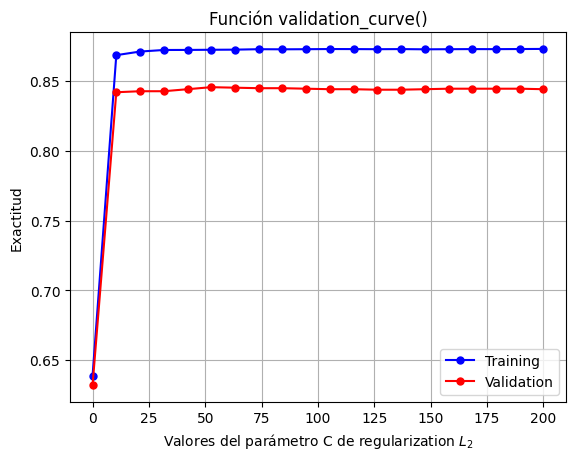

In [39]:
delta_C = np.linspace(.0001, 200., 20)

modelo = LogisticRegression(penalty='l2',
                            max_iter=10000,
                            solver='liblinear',
                            random_state=1)

Xx = columnasTransformer.fit_transform(Xtv)

cvLC = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=11)

train_scores, valid_scores = validation_curve(modelo,
                                              Xx,
                                              np.ravel(ytv),
                                              param_name="C",
                                              param_range=delta_C,
                                              cv=cvLC,
                                              scoring='accuracy')


train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)


# Curva de entrenamiento con la métrica de exactitud (accuracy):
plt.plot(delta_C, train_mean, color='blue', marker='o', markersize=5, label='Training')

# Curva de validación:
plt.plot(delta_C, valid_mean, color='red', marker='o', markersize=5, label='Validation')

plt.title('Función validation_curve()')
plt.xlabel('Valores del parámetro C de regularization $L_2$')
plt.ylabel('Exactitud')
plt.grid()
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Salvo el primer valor, el modelo se mantiene casi constante tanto para
# los datos de entrenamiento como de validación:

print('Valor promedio de los resultados con los conjuntos de entrenamiento: %.3f' % train_mean[1:20].mean())
print('Valor promedio de los resultados con los conjuntos de validación: %.3f' % valid_mean[1:20].mean())

Valor promedio de los resultados con los conjuntos de entrenamiento: 0.873
Valor promedio de los resultados con los conjuntos de validación: 0.844


Como comentamos al estudiar los casos de modelos subentrenados, cuando tenemos que las curvas de entrenamiento y validación son casi constantes durante casi todos los casos de complejidad considerados, esto es un indicio de modelo subentrenado. Es decir, el modelo no tiene la complejidad suficiente para poder "aprender" o mejorar su desempeño con algún valor del parámetro seleccionado.

Por otro lado, observamos que el modelo de clasificación se mantiene en todo momento en un desempeño con el conjunto de validación de un valor casi constante del $84.4\%$. En algunos casos esto podría considerarse un resultado aceptable, sin embargo nunca se muestra una mejoría a lo largo del proceso para algún valor del hiperparámetro $C$, por lo cual pudiéramos decir que el modelo en ningún momento es capaz de extraer mayor información relevante que ayude en el incremento del desempeño, por lo podemos decir que el modelo está subentrenado.

Inclusive se observa también algo de sobreentrenamiento, debido a la separación entre ambas curvas en todo momento de casi un $3\%$.

Estos resultados son consistentes con lo analizado en la actividad de la semana pasada.




###**Curvas de aprendizaje con base al tamaño del conjunto de entrenamiento**

Por su parte, la función, learning_curve() de scikit-learn,
 nos permitirá obtener los desempeños del modelo para diferentes tamaños del conjunto de entrenamiento y validación.

Consultar la documentación correspondiente:

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.learning_curve.html#

In [ ]:
from sklearn.model_selection import learning_curve

In [ ]:
modeloLC = LogisticRegression(penalty='l2',
                              max_iter=10000,
                              C=100.,
                              solver='liblinear',
                              random_state=1)

En particular, la instrucción np.linspace(0.1, 1.0, 20) en el argumento "train_sizes" generará de manera incremental 20 valores desde el 10% hasta el 100% del conjunto de datos que tenemos asignados para entrenamiento y validación.


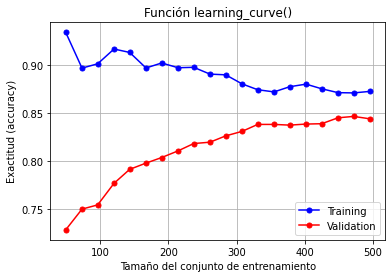

In [ ]:
delta_train_sz = np.linspace(0.1, 1.0, 20)

cvLC = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=11)

train_sizes, train_scores, valid_scores = learning_curve(estimator=modeloLC,
                                                        X=Xx,
                                                        y=np.ravel(ytv),
                                                        cv=cvLC,
                                                        train_sizes=delta_train_sz,
                                                        scoring='accuracy')



# Obtengamos la gráfica de las curvas de aprendizaje
# cuando se incrementa el tamaño de la muestra:

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training')

plt.plot(train_sizes, valid_mean, color='red', marker='o', markersize=5, label='Validation')

plt.title('Función learning_curve()')
plt.xlabel('Tamaño del conjunto de entrenamiento')
plt.ylabel('Exactitud (accuracy)')
plt.grid()
plt.legend(loc='lower right')
plt.show()

In [ ]:
print(train_scores.shape)

(20, 50)


Tenemos 20 resultados con 50 repeticiones para cada uno de los 20 valores dados al hiperparámetro $C$.

Del gráfico observamos nuevamene que la separación entre ambas curvas al final de ellas, está entre un $2$ o $3\%$, aproximadamente.

Es decir, podríamos decir que se observa nuevamente un ligero sobreentrenamiento, aunque cabría la pregunta de si las curvas pudieran continuar acercándose si tuviéramos más datos para seguir incrementando el tamaño de la muestra.

Además, observamos de nuevo que el porcentaje de desempeño al que se llega al final de la curva de validación es de un poco menos del $85\%$. Y aunque podríamos decir que este es un porcentaje de exactidud relativamente aceptable, el ligero sobreentrenamiento nos hace pensar en que este valor no es del todo confiable.

En conclusión, ambas curvas nos hablan de que existe un subentrenamiento y sobreentrenamiento con el modelo de regresión logística, por lo que de preferencia sería mejor intentar con un nuevo modelo de aprendizaje automático que tenga mayor capacidad de enfrentar problemas no lineales. Más adelante en el curso estudiaremos varios de estos otros modelos.


###**--Fin del Jupyter-Notebook de la Semana 4--**